In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
#             Data Load: Load banglore home prices into a dataframe

In [3]:
df1  = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
                                        # data cleaningabs

In [5]:
df1['price'] = df1['price'] * 100

In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,3907.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,12000.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,6200.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,9500.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,5100.0


In [7]:
df1.shape

(13320, 9)

In [8]:
df1.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony    price  
0          2 BHK  Coomee        1056  

<AxesSubplot:>

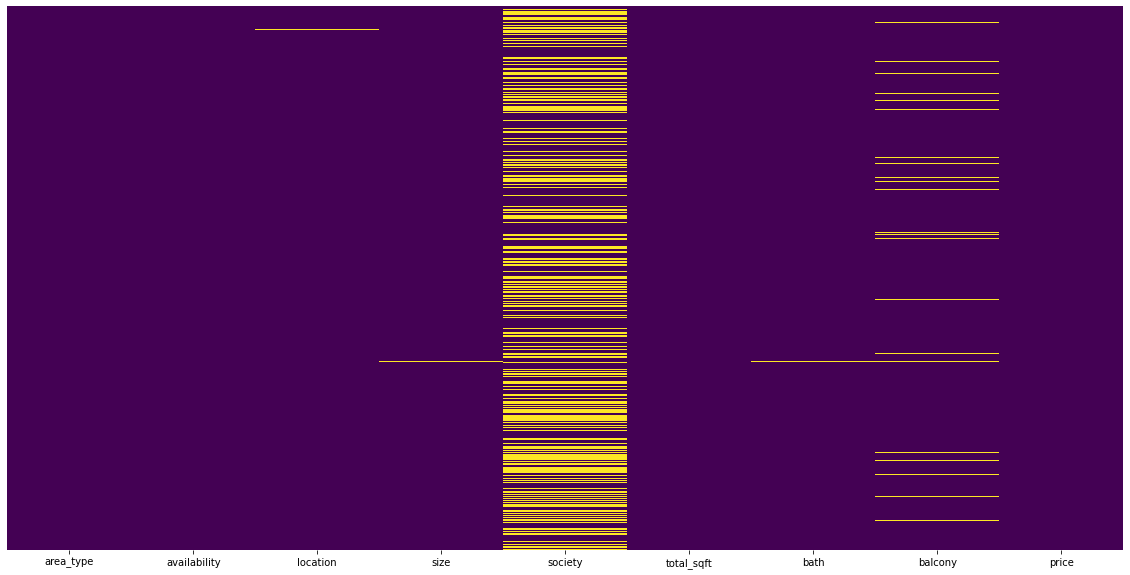

In [9]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# area_type i mej inch arjeqner kan 
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
# we drope [availibility, society ]columns 
df2 = df1.drop(['area_type', 'society', 'availability', 'balcony'], axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,3907.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,12000.0
2,Uttarahalli,3 BHK,1440,2.0,6200.0
3,Lingadheeranahalli,3 BHK,1521,3.0,9500.0
4,Kothanur,2 BHK,1200,2.0,5100.0


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


<AxesSubplot:>

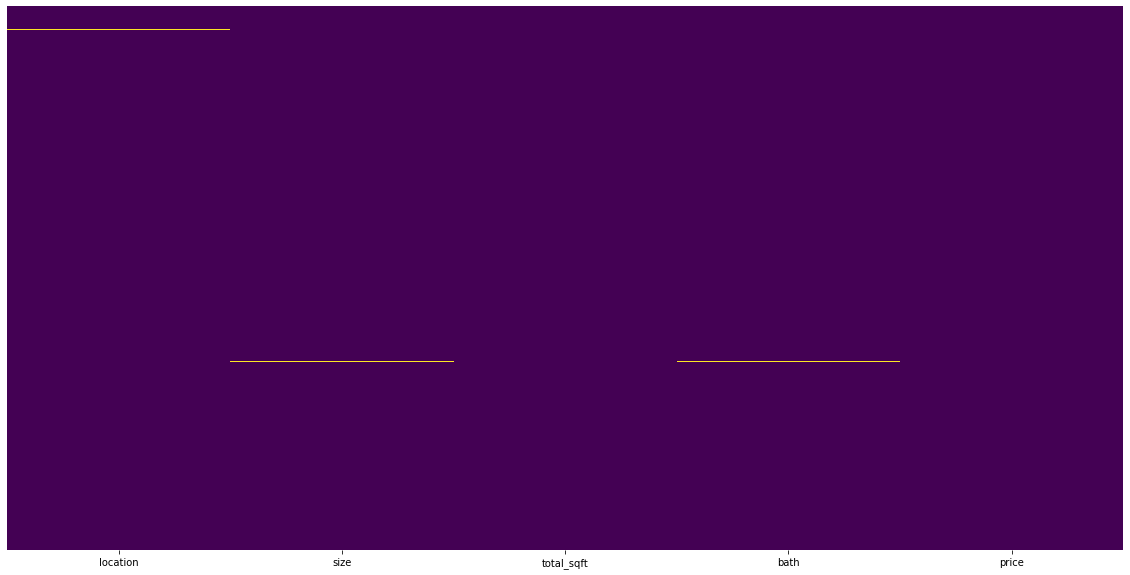

In [12]:
print(df2.isnull().sum())
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [14]:
# I want to remov (strings) from [size] columns
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
                                #  Feature Engineering
                        #  Add new feature(integer) for Bedrooms Hall Kitchen 

In [16]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Hayk\AppData\Local\Temp\ipykernel_20328\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,3907.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,12000.0,4
2,Uttarahalli,3 BHK,1440,2.0,6200.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,9500.0,3
4,Kothanur,2 BHK,1200,2.0,5100.0,2


In [17]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3[df3['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,23000.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,66000.0,43


In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
# Explore total_sqft feature

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,18600.0,4
122,Hebbal,4 BHK,3067 - 8156,4.0,47700.0,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,5400.5,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,4349.0,2
188,KR Puram,2 BHK,1015 - 1540,2.0,5680.0,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,1850.0,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,6377.0,2
648,Arekere,9 Bedroom,4125Perch,9.0,26500.0,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,4813.0,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,44500.0,4


In [22]:


# Above shows that total_sqft can be a range (e.g. 2100-2850). 
# For such case we can just take average of min and max value in the range. 
# There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.
# I am going to just drop such corner cases to keep things simple

def convet_sqft_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        None

In [23]:
convet_sqft_num('3090 - 5002')

4046.0

In [24]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convet_sqft_num)
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price           18600.0
bhk                   4
Name: 30, dtype: object

In [25]:
                            # Feature Engineering

In [26]:
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000.0,4


In [27]:
# Add new feature called price per square feet


In [28]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907.0,2,369981.060606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000.0,4,461538.461538
2,Uttarahalli,3 BHK,1440.0,2.0,6200.0,3,430555.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,9500.0,3,624589.086128
4,Kothanur,2 BHK,1200.0,2.0,5100.0,2,425000.000000


In [29]:
len(df5.location.unique())

1304

In [30]:
# Examine locations which is a categorical variable.
# We need to apply dimensionality reduction technique here to reduce number of locations


df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1052

In [32]:
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [33]:
len(df5.location.unique())

1293

In [34]:
df5.location = df5.location.apply(lambda x: "other" if  x in location_stats_less_then_10 else x)
len(df5.location.unique())

242

In [35]:
                                             #  Outlier Removal

In [36]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907.0,2,369981.060606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000.0,4,461538.461538
2,Uttarahalli,3 BHK,1440.0,2.0,6200.0,3,430555.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,9500.0,3,624589.086128
4,Kothanur,2 BHK,1200.0,2.0,5100.0,2,425000.000000


In [37]:
# Outlier Removal Using Business Logic
df5[df5.total_sqft/ df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,37000.0,6,3.627451e+06
45,HSR Layout,8 Bedroom,600.0,9.0,20000.0,8,3.333333e+06
58,Murugeshpalya,6 Bedroom,1407.0,4.0,15000.0,6,1.066098e+06
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,8500.0,8,6.296296e+05
70,other,3 Bedroom,500.0,3.0,10000.0,3,2.000000e+06


In [38]:
df5.shape

(13246, 7)

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape 

(12502, 7)

In [40]:
# Outlier Removal Using Standard Deviation and Mean

df6.price_per_sqft.describe()

count    1.245600e+04
mean     6.308503e+05
std      4.168127e+05
min      2.678298e+04
25%      4.210526e+05
50%      5.294118e+05
75%      6.916667e+05
max      1.764706e+07
Name: price_per_sqft, dtype: float64

In [41]:
# Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, 
# this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Corrected initialization
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=False)
    return df_out

df7 = remove_pps_outliers(df6)
print(df7.shape)

(10241, 7)


In [43]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

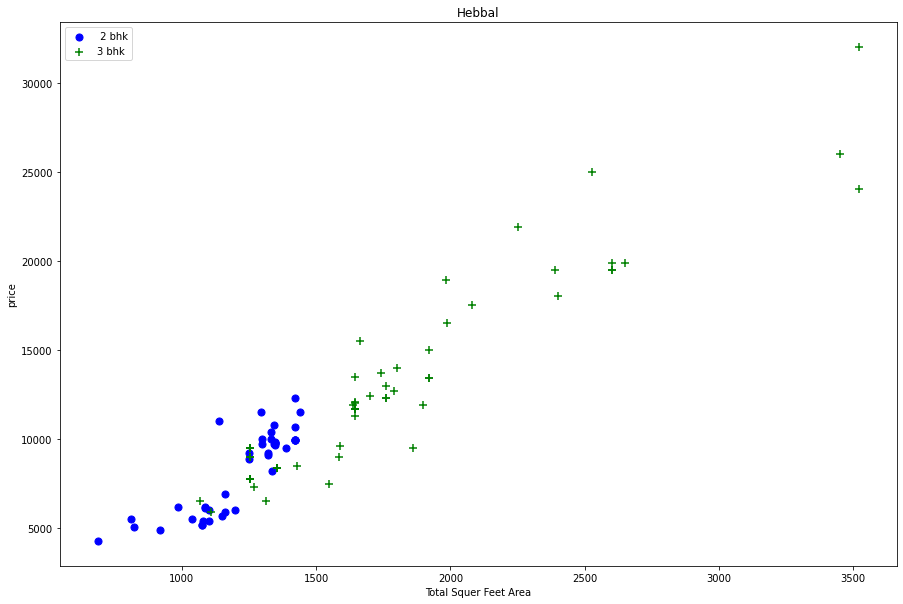

In [44]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue', label= ' 2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+',color='green', label='3 bhk', s = 50)
    plt.xlabel("Total Squer Feet Area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Hebbal")

In [45]:
# I just found blue points
blue_point = df7[(df7["location"] == "Rajaji Nagar") & (df7["bhk"] == 2)]
len(blue_point)

14

In [46]:
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in  df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] >5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft< (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

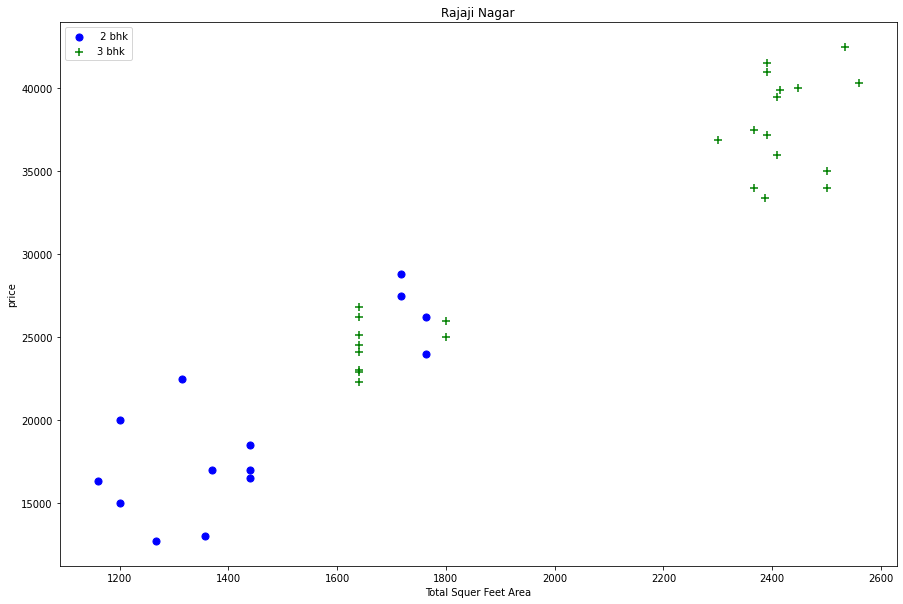

In [48]:
plot_scatter_chart(df8,"Rajaji Nagar")

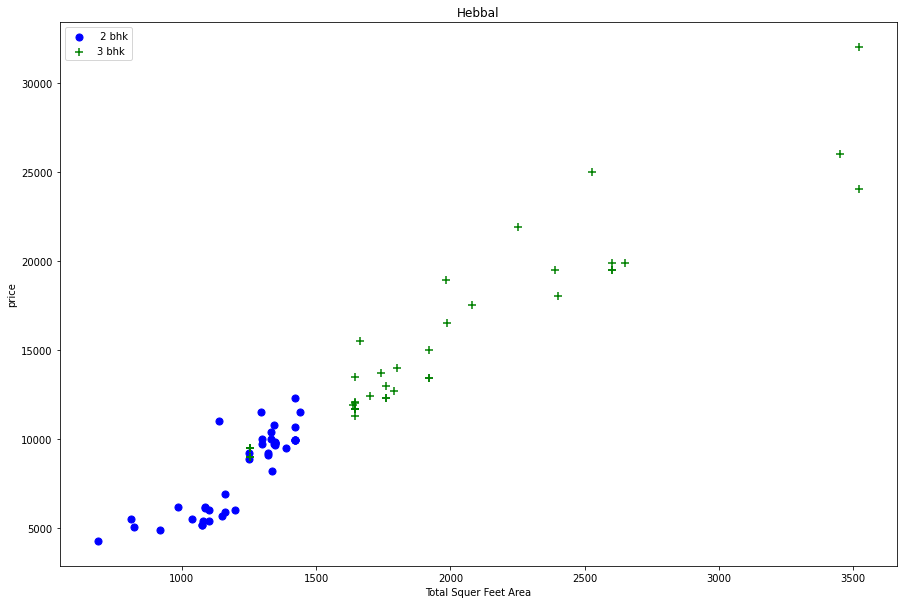

In [49]:
plot_scatter_chart(df8, "Hebbal")

In [50]:
# Based on above charts we can see that data points highlighted in red below are outliers and they are
# being removed due to remove_bhk_outliers function

Text(0, 0.5, 'Count')

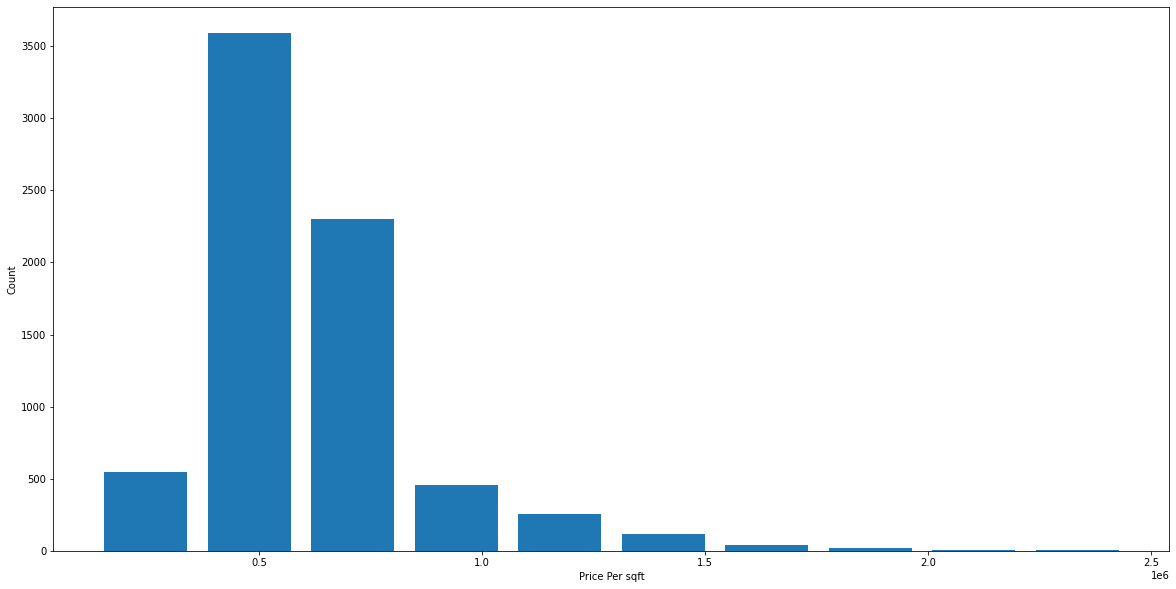

In [51]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")

In [52]:
# Outlier Removal Using Bathrooms Feature
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,16000.0,10,400000.000000
3096,other,10 BHK,12000.0,12.0,52500.0,10,437500.000000
3609,other,16 BHK,10000.0,16.0,55000.0,16,550000.000000
7979,other,11 BHK,6000.0,12.0,15000.0,11,250000.000000
9935,other,13 BHK,5425.0,13.0,27500.0,13,506912.442396


Text(0, 0.5, 'Count')

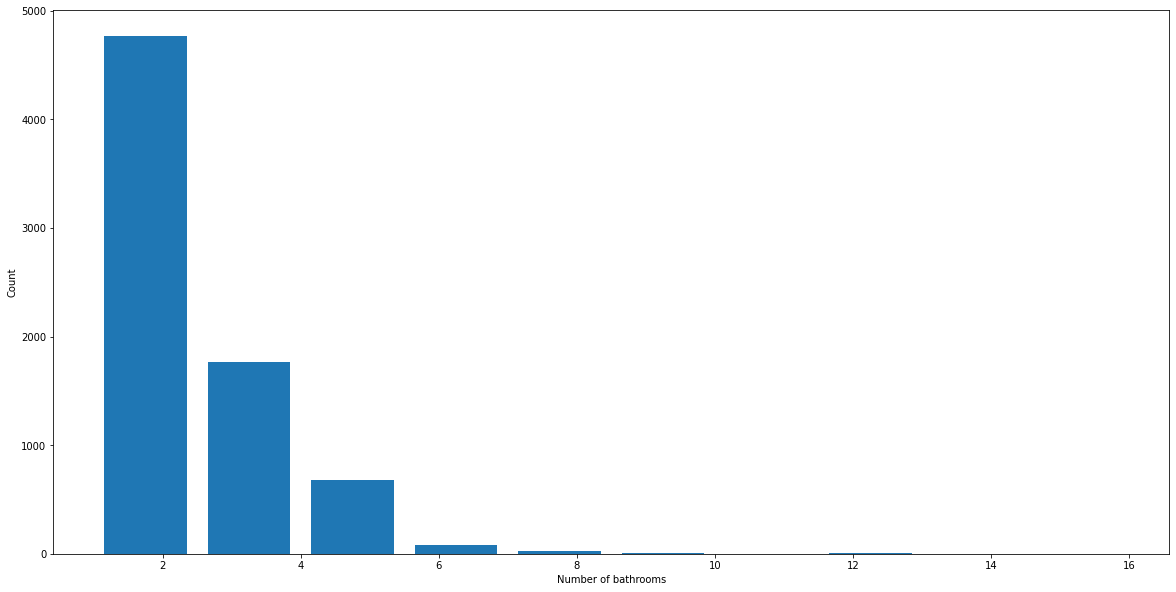

In [54]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [55]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,8000.0,4,325203.252033
11366,Nagasandra,4 Bedroom,7000.0,8.0,45000.0,4,642857.142857
12103,Thanisandra,3 BHK,1806.0,6.0,11600.0,3,642303.433001
2620,other,6 BHK,11338.0,9.0,100000.0,6,881989.768919


In [56]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [57]:
                                # Model Building 

In [58]:
df10 = df9.drop(['size', "price_per_sqft"], axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,42800.0,4
848,1st Block Jayanagar,1630.0,3.0,19400.0,3
2152,1st Block Jayanagar,1875.0,2.0,23500.0,3


In [59]:
#  Use Get dummies encoding For Location

dummies = pd.get_dummies(df10['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11 = pd.concat([df10,dummies.drop('other', axis='columns')], axis='columns')
df11.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,42800.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,19400.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df12 = df11.drop("location", axis="columns")
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,42800.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,19400.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y = df12.price
y.head(3)

210     42800.0
848     19400.0
2152    23500.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.8452277697874341

In [66]:
#                       Use K Fold cross validation to measure accuracy of our LinearRegression model
from  sklearn.model_selection import  ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,  random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [67]:
                #   We can see that in 5 iterations we get a score above 80% all the time.
                # This is pretty good but we want to test few other algorithms for regression to see
                # if we can get even better score. We will use GridSearchCV for this purpose

In [68]:
#   find best model using GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.813485,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.756435,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [70]:
#     Based on our results we can say that LinearRegression gives the best score 

In [71]:
#  Test the model for few properties

def  predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [86]:
price = predict_price('1st Phase JP Nagar', 1000, 2,2)
print(f"This Huse prise will be about ${price}")

This Huse prise will be about $8349.904677191707


C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
price = predict_price('Indira Nagar',1000, 2, 2)
print(f"This Huse prise will be about ${price}")

This Huse prise will be about $18127.81548400662


C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
price = predict_price('Indira Nagar',1000, 5, 4)
print(f"This Huse prise will be about ${price}")

This Huse prise will be about $19296.94741451092


C:\Users\Hayk\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
#  how to export this model and use  in website 

In [76]:
import pickle 
with open('banglore_home_price_model.price', 'wb') as f:
    pickle.dump(lr_clf,f)

In [77]:
#  Import location and column information  to a file  that we will use on our  prediction application

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))